<a href="https://colab.research.google.com/github/ssk1177/Predictive-Analytics/blob/main/Evaluation_%26_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Evaluation & Optimization**

__Objective__ is to train and evaluate three (3) classification models with different algorithms (SVM, Logistic regression, & KNN) and compare the performance on the test dataset using multiple measures of performance.

**Dataset**: Digits dataset

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#digits-dataset

# Table of Contents <a class="anchor" id="toc"></a>
* [Functional Blocks](#functional_blocks)
* [Load the Packages](#load_packages)
* [Data Preparation](#data_prep)
    * [flatten the images](#flatten_images)
    * [Split the dataset](#split_data)
* [Classifier: SVM](#svm)
    * [Fit the Classifier](#fit_svm)
    * [Predictions](#svm_preds)
    * [Metrics](#svm_metrics)
        * [Classification Report](#svm_metrics_cr)
        * [Classification Matrix](#svm_metrics_cm)
* [Classifier: Logistic Regression](#lr)
    * [Fit the Classifier](#fit_lr)
    * [Predictions](#lr_preds)
    * [Metrics](#lr_metrics)
        * [Classification Report](#lr_metrics_cr)
        * [Classification Matrix](#lr_metrics_cm)
* [Classifier: KNN](#knn)
    * [Fit the Classifier](#fit_knn)
    * [Predictions](#knn_preds)
    * [Metrics](#knn_metrics)
        * [Classification Report](#knn_metrics_cr)
        * [Classification Matrix](#knn_metrics_cm)
* [Models Comparison](#comparison)
* [Hyperparameter Tuning](#lr_Hyperparameter_Tuning)
    * [RandomizedSearchCV](#lr_rcv)
    * [GridSearchCV](#lr_gcv)
* [Summary](#summary)
    

# Functional Blocks <a class="anchor" id="functional_blocks"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
def displayConfusionMatrix(y_test, predictions):
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    disp.figure_.suptitle("Confusion Matrix")
    #print(f"Confusion matrix:\n{disp.confusion_matrix}")

    plt.show()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")



# Load the Packages <a class="anchor" id="load_packages"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import time
import numpy as np

from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Data Preparation <a class="anchor" id="data_prep"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

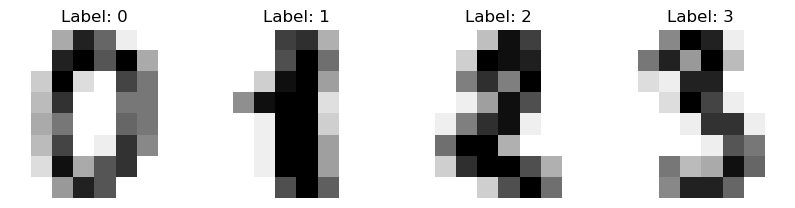

In [ ]:
X, y = datasets.load_digits(return_X_y=True)

# Show the first 4 Training Samples with their label in title
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

## flatten the images <a class="anchor" id="flatten_images"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>
To apply a classifier on this dataset, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,)

In [ ]:
# flatten the images
n_samples = len(X)
data = X.reshape((n_samples, -1))

# Split the dataset <a class="anchor" id="split_data"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False
)

# Classifier: SVM <a class="anchor" id="svm"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
# Create a classifier: a support vector classifier
clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1500)

## Fit the Classifier <a class="anchor" id="fit_svm"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

SGDClassifier(max_iter=1500, penalty='elasticnet')

## Predictions <a class="anchor" id="svm_preds"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

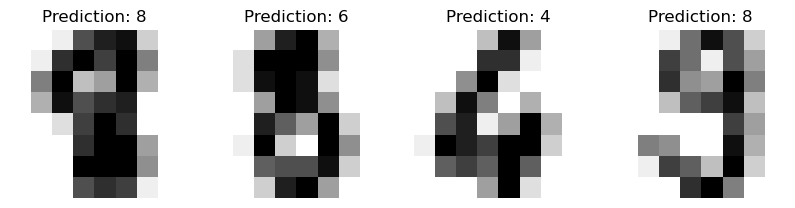

In [ ]:
# Predict the value of the digit on the test subset
predictions = clf.predict(X_test)

# Plot first 4 test samples and show their predicted digit value in the title
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Metrics <a class="anchor" id="svm_metrics"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

### Classification Report <a class="anchor" id="svm_metrics_cr"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
svm_acc = round(metrics.accuracy_score(y_test, predictions), 4)*100

print(
    f"Accuracy: {svm_acc}\n\n"
    f"Classification report for classifier {clf}:\n\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Accuracy: 92.77

Classification report for classifier SGDClassifier(max_iter=1500, penalty='elasticnet'):

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.90      0.89      0.90        91
           2       1.00      1.00      1.00        86
           3       0.96      0.84      0.89        91
           4       0.99      0.93      0.96        92
           5       0.87      0.95      0.91        91
           6       0.93      0.99      0.96        91
           7       0.96      0.96      0.96        89
           8       0.90      0.85      0.88        88
           9       0.85      0.90      0.87        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




### Classification Matrix <a class="anchor" id="svm_metrics_cm"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

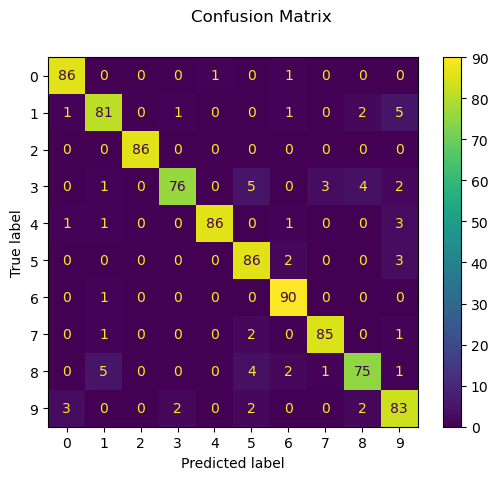

In [ ]:
displayConfusionMatrix(y_test, predictions)

# Classifier: Logistic Regression <a class="anchor" id="lr"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
LogRegression = SGDClassifier(loss="log_loss", penalty="elasticnet", max_iter=1500)

## Fit the Classifier <a class="anchor" id="fit_lr"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
LogRegression.fit(X_train, y_train)

SGDClassifier(loss='log_loss', max_iter=1500, penalty='elasticnet')

## Predictions <a class="anchor" id="lr_preds"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
predictions = LogRegression.predict(X_test)

## Metrics <a class="anchor" id="lr_metrics"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

### Classification Report <a class="anchor" id="lr_metrics_cr"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
lr_acc = round(metrics.accuracy_score(y_test, predictions), 4)*100
print(
    f"Accuracy: {lr_acc}\n\n"
    f"Classification report for classifier {clf}:\n\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Accuracy: 92.10000000000001

Classification report for classifier SGDClassifier(max_iter=1500, penalty='elasticnet'):

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        88
           1       0.93      0.89      0.91        91
           2       0.98      0.99      0.98        86
           3       0.95      0.82      0.88        91
           4       0.99      0.91      0.95        92
           5       0.83      0.95      0.88        91
           6       0.91      0.99      0.95        91
           7       0.95      0.94      0.95        89
           8       0.84      0.89      0.86        88
           9       0.87      0.89      0.88        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899




### Classification Matrix <a class="anchor" id="lr_metrics_cm"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

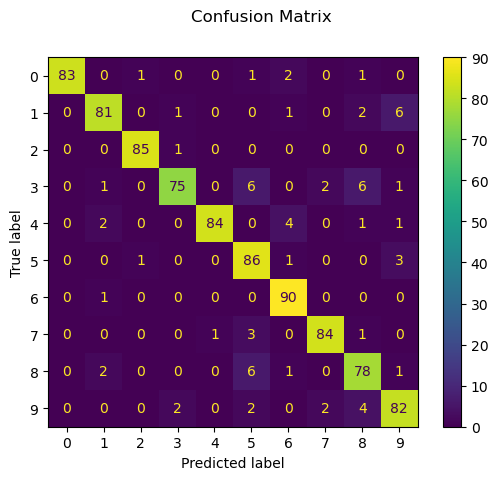

In [ ]:
displayConfusionMatrix(y_test, predictions)

# Classifier: KNN <a class="anchor" id="knn"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
knn = KNeighborsClassifier()

## Fit the Classifier <a class="anchor" id="fit_knn"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Metrics <a class="anchor" id="knn_metrics"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

### Classification Report <a class="anchor" id="knn_metrics_cr"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
knn_acc = round(metrics.accuracy_score(y_test, predictions), 4) * 100

print(
    f"Accuracy: {knn_acc}\n\n"
    f"Classification report for classifier {clf}:\n\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Accuracy: 92.10000000000001

Classification report for classifier SGDClassifier(max_iter=1500, penalty='elasticnet'):

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        88
           1       0.93      0.89      0.91        91
           2       0.98      0.99      0.98        86
           3       0.95      0.82      0.88        91
           4       0.99      0.91      0.95        92
           5       0.83      0.95      0.88        91
           6       0.91      0.99      0.95        91
           7       0.95      0.94      0.95        89
           8       0.84      0.89      0.86        88
           9       0.87      0.89      0.88        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899




### Classification Matrix <a class="anchor" id="knn_metrics_cm"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

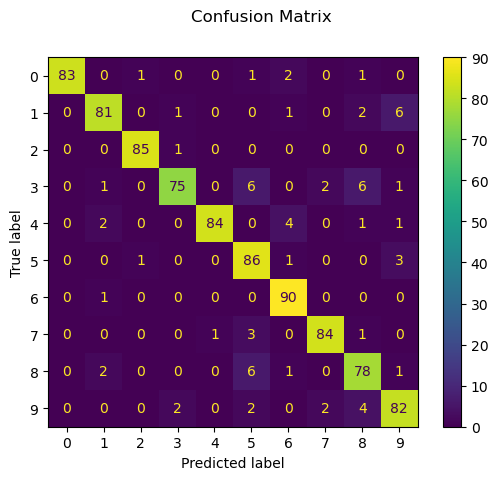

In [ ]:
displayConfusionMatrix(y_test, predictions)

# Comparison <a class="anchor" id="comparison"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
from IPython.display import Markdown as md

if(svm_acc > lr_acc):
    tune_algo = 'SVM'
    algo = clf       # SVM
else:
    tune_algo = 'Logistic Regression'
    algo = LogRegression

md('''Following were the accuracy observed from the models: \n
- __SVM__: {} \n
- __Logistic Regression__: {} \n
- __KNN__: {} \n \n

Since __{}__ shows the __highest accuracy__, we can further optimize it by tuning the hyperparameter of it.

'''.format(svm_acc, lr_acc, knn_acc, tune_algo))

Following were the accuracy observed from the models: 

- __SVM__: 92.77 
 
- __Logistic Regression__: 92.10000000000001 

- __KNN__: 92.10000000000001 
 


Since __SVM__ shows the __highest accuracy__, we can further optimize it by tuning the hyperparameter of it.



## Hyperparameter Tuning <a class="anchor" id="Hyperparameter_Tuning"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

### RandomizedSearchCV <a class="anchor" id="lr_params_rcv"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
# specify parameters and distributions to sample from
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": stats.loguniform(1e-2, 1e0),
}

# run randomized search
n_rs_iter_search = 30

random_search = RandomizedSearchCV(
    algo, param_distributions=param_dist, n_iter=n_rs_iter_search
)

start = time()
random_search.fit(X, y)

#report(random_search.cv_results_)
rcv_time = (time() - start)
rcv_acc = round(metrics.accuracy_score(y_test, random_search.predict(X_test)), 4) * 100

print("**** Tuning Hyperparameters for", tune_algo, "*****\n\n")

print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings.\n\n"
    % (rcv_time, n_rs_iter_search)
)
print("Best Params:", random_search.best_params_, "\n")
print("Accuracy:", rcv_acc)

****Tuning Hyperparameters for SVM *****


RandomizedSearchCV took 17.31 seconds for 30 candidates parameter settings.


Best Params: {'alpha': 0.04564004022495756, 'average': False, 'l1_ratio': 0.05726298063286195} 

Accuracy: 98.0


### GridSearchCV <a class="anchor" id="lr_params_gcv"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
# use a full grid over all parameters
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(algo, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

gcv_time = time() - start

gcv_acc = round(metrics.accuracy_score(y_test, grid_search.predict(X_test)), 4) * 100
params_cand_set =  len(grid_search.cv_results_["params"])

print("**** Tuned Hyperparameters for", tune_algo, "****\n\n")
print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings.\n\n"
    % (gcv_time, params_cand_set)
)
print("Best Params:", grid_search.best_params_, "\n")
print("Accuracy:", gcv_acc)

****Tuned Hyperparameters for SVM ****


GridSearchCV took 59.81 seconds for 60 candidate parameter settings.


Best Params: {'alpha': 1.0, 'average': False, 'l1_ratio': 0.0} 

Accuracy: 95.44


# Summary <a class="anchor" id="summary"></a> <p style="text-align: right; color: blue; font-size: 15px;"> [Go to Main Menu](#toc) </p>

In [ ]:
from IPython.display import Markdown as md

md('''
Here are the accuracies of different algorithms without hyperparameter tuning:

- __SVM__: {}% \n
- __Logistic Regression__: {}% \n
- __KNN__: {}% \n

Since {} show better accrucay, so on tuning hyperparameters with following techniques: \n

- __Using RandomizedSearchCV__: \n

    - Time taken: {} seconds for {} candidate parameter settings \n
    - Accuracy: {}% \n

- __Using GridSearchCV__: \n

    - Time taken: {} seconds for {} candidate parameter settings \n
    - Accuracy: {}% \n
\n
__RandomizedSearchCV provided better accuracy in less time compared to GridSearchCV__.
'''.format(svm_acc, lr_acc, knn_acc, tune_algo, rcv_time, n_rs_iter_search, rcv_acc, gcv_time, params_cand_set, gcv_acc))


Here are the accuracies of different algorithms without hyperparameter tuning:

- __SVM__: 92.77% 

- __Logistic Regression__: 92.10000000000001% 

- __KNN__: 92.10000000000001% 


Since SVM show better accrucay, so on tuning hyperparameters with following techniques: 


- __Using RandomizedSearchCV__: 


    - Time taken: 17.31121587753296 seconds for 30 candidate parameter settings 

    - Accuracy: 98.0% 


- __Using GridSearchCV__: 


    - Time taken: 59.80660390853882 seconds for 60 candidate parameter settings 

    - Accuracy: 95.44% 



__RandomizedSearchCV provided better accuracy in less time compared to GridSearchCV__.
